In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import math
from lasso_func import *

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Varying values

In [2]:
# Vary number of observations
def vary_obs(model):
    k = 10
    m = 1
    a = 0.1
    n = [100,250,500,1000]
    c = 1
    for i in n: 
        y, x_1, x_2 = gen_data(nobs=i, num_cov=k, m=m, num_relevant_cov=c)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(i, k, a, m, c, model)
            lst.append(results)
        output = mse(lst, i, i, model)
    plt.legend()
    plt.show()

# Vary alpha levels
def vary_alpha(model):
    k = 10
    m = 10
    a = [0,0.1,0.5,1]
    n = 1000
    c = 1
    for i in a: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=m, num_relevant_cov=c)
        x = setup_test_params(y, x_1, x_2, i, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, k, i, m, c, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()

# Vary number of x variables
def vary_xvars(model):
    k = [1,10,25,50]
    m = 1
    a = 0.1
    n = 1000
    c = 1
    for i in k: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m, num_relevant_cov=c)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, i, a, m, c, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()

# Vary the model with a multiplicative factor
def vary_multiply(model):
    k = 10
    m = [0.1,0.5,1,2]
    a = 0.1
    n = 1000
    c = 1
    for i in m: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=i, num_relevant_cov=c)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, k, a, i, c, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()    
    
def params_scatter(model):
    single_models = [1,2,3]
    k = [1,10,25,50]
    m = 1
    a = 0.1
    n = 1000
    c = 1
    if model in single_models:
        for i in k:
            y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m, num_relevant_cov=c)
            x = setup_test_params(y, x_1, x_2, a, model)
            plt.scatter(range(len(x.params)), x.params, label=i)
            plt.legend()
            plt.show()
    else:
        for i in k:
            y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m, num_relevant_cov=c)
            x = setup_test_params(y, x_1, x_2, a, model)
            for j in list(setup_test_params(y, x_1, x_2, a, model)):
                plt.scatter(range(len(j.params)), j.params)
            plt.legend(['model1','model2'])
            plt.show()

Vary Observations
Mean: 7.308618618077987 Median: 7.337370358993969 Mode: [[4.62816141]] Variance: 0.6299071939653649
Mean: 11.345678145713848 Median: 11.349950374668676 Mode: [[7.99946616]] Variance: 0.6970416004437318
Mean: 15.931459611160118 Median: 15.937822244973486 Mode: [[13.05860161]] Variance: 0.7331471468569921
Mean: 22.457819341250424 Median: 22.483328104435984 Mode: [[19.77653835]] Variance: 0.7043387363567717


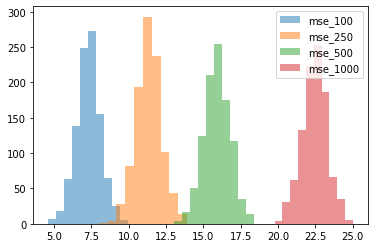

Vary Alpha Levels
Mean: 22.436298921269714 Median: 22.44738561736082 Mode: [[18.90218928]] Variance: 0.748686877695903
Mean: 22.375374836488348 Median: 22.36760856835881 Mode: [[19.19326449]] Variance: 0.7401401525194646
Mean: 22.449393948038473 Median: 22.4242058580796 Mode: [[19.71255115]] Variance: 0.6849093483221559
Mean: 22.40861448925576 Median: 22.394697498314947 Mode: [[19.37304063]] Variance: 0.7428243158165808


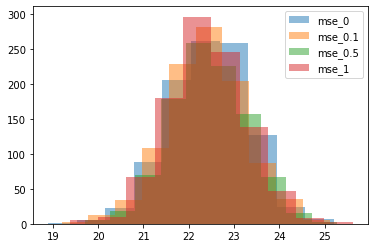

Vary Multiplicative Factors
Mean: 22.453146432856663 Median: 22.459494820551903 Mode: [[18.97765096]] Variance: 0.763489985018759
Mean: 22.451039262492078 Median: 22.462957062691984 Mode: [[19.6102691]] Variance: 0.6768371120709401
Mean: 22.448746025994573 Median: 22.424059152454028 Mode: [[19.07575395]] Variance: 0.6313414526746833
Mean: 22.447381159109355 Median: 22.46373804111044 Mode: [[19.77267853]] Variance: 0.8219596284850774


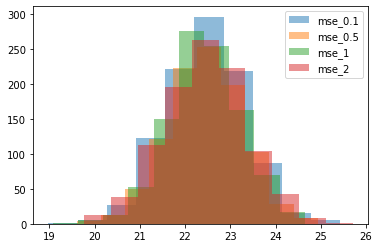

Vary X Variables
Mean: 22.436453366129758 Median: 22.4377090468004 Mode: [[19.86413033]] Variance: 0.7151851054555041
Mean: 22.404415672830055 Median: 22.426569223219452 Mode: [[19.44243447]] Variance: 0.7447067781185087
Mean: 22.45586939423242 Median: 22.487139752039248 Mode: [[18.79795658]] Variance: 0.7979175073606558
Mean: 22.499381553240312 Median: 22.52308786557062 Mode: [[19.9515717]] Variance: 0.6766664763687893


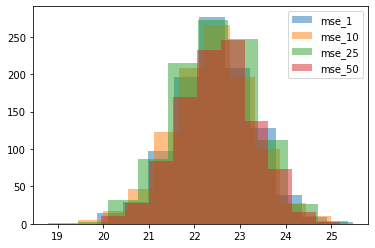

Plot Coefficients


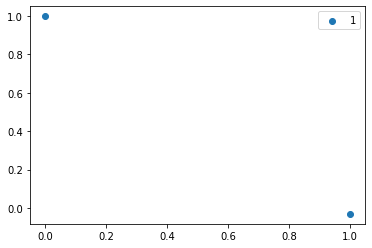

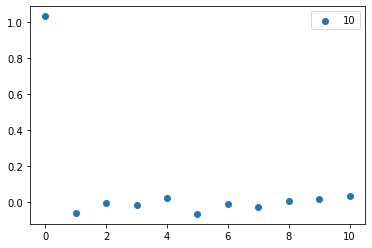

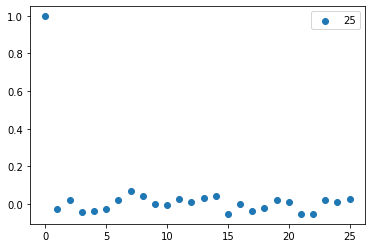

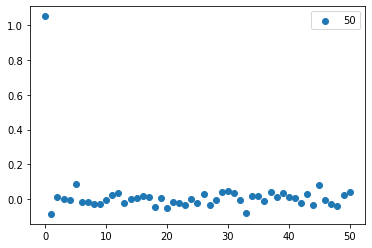

In [3]:
# Model = 1 is OLS
print('Vary Observations')
vary_obs(1)
print('Vary Alpha Levels')
vary_alpha(1)
print('Vary Multiplicative Factors')
vary_multiply(1)
print('Vary X Variables')
vary_xvars(1)  
print('Plot Coefficients')
params_scatter(1)   

Vary Observations
Mean: 7.285925790607088 Median: 7.278105048779606 Mode: [[4.79034051]] Variance: 0.6102978129110986
Mean: 11.348145991908062 Median: 11.337746802247402 Mode: [[8.31047669]] Variance: 0.7275120295045114
Mean: 15.927054029911535 Median: 15.937659985035413 Mode: [[13.20696629]] Variance: 0.6775484603769408
Mean: 22.43389820524854 Median: 22.462646747847614 Mode: [[19.96313244]] Variance: 0.6724199727348109


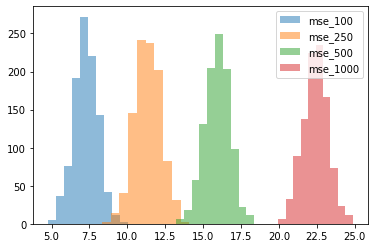

Vary Alpha Levels
Mean: 22.46257735512004 Median: 22.43238797884903 Mode: [[19.82924844]] Variance: 0.7467938615060129
Mean: 22.46018370335576 Median: 22.436796187041832 Mode: [[19.20618707]] Variance: 0.7904885862343551
Mean: 22.442382332921856 Median: 22.48920011324961 Mode: [[19.2272626]] Variance: 0.7434917302740818
Mean: 22.493111840365515 Median: 22.53635106266152 Mode: [[19.76555573]] Variance: 0.7227791879899663


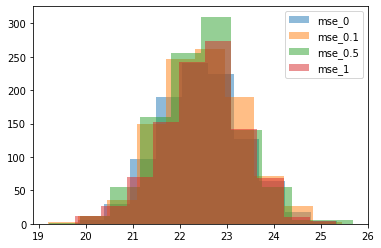

Vary Multiplicative Factors
Mean: 22.470511125768155 Median: 22.459264321418086 Mode: [[19.60036176]] Variance: 0.7516151379261115
Mean: 22.49627651354665 Median: 22.505325325968226 Mode: [[19.33146431]] Variance: 0.6972550976913748
Mean: 22.423837419848606 Median: 22.472294284771856 Mode: [[19.78990308]] Variance: 0.7528749886277506
Mean: 22.452734448620987 Median: 22.52304919485341 Mode: [[18.94794324]] Variance: 0.7551589863367155


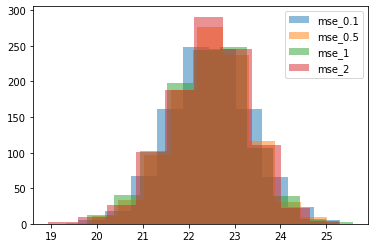

Vary X Variables
Mean: 22.460626263593554 Median: 22.463818115350378 Mode: [[19.83273624]] Variance: 0.6917411594232765
Mean: 22.434998716717065 Median: 22.462196422155966 Mode: [[19.01975837]] Variance: 0.74529125524189
Mean: 22.43064647190247 Median: 22.480653295486366 Mode: [[19.47423433]] Variance: 0.7859042823372927
Mean: 22.47100880285155 Median: 22.47125777176197 Mode: [[19.88577594]] Variance: 0.7706351523247773


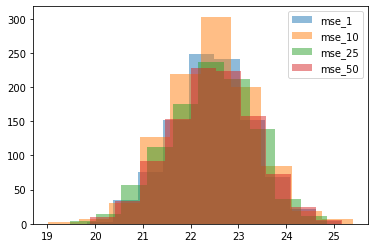

Plot Coefficients


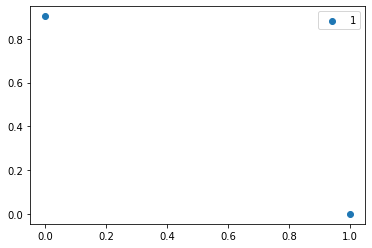

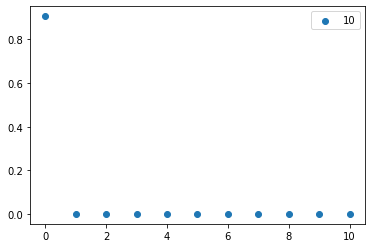

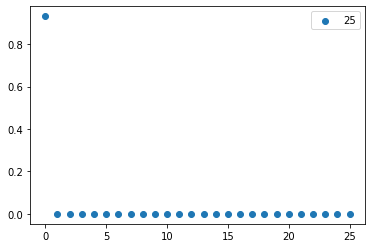

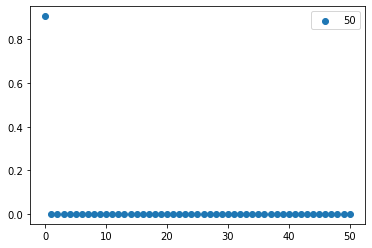

In [4]:
# Model = 2 is Lasso
print('Vary Observations')
vary_obs(2)
print('Vary Alpha Levels')
vary_alpha(2)
print('Vary Multiplicative Factors')
vary_multiply(2)
print('Vary X Variables')
vary_xvars(2)   
print('Plot Coefficients')
params_scatter(2)

Vary Observations
Mean: 7.308232512855587 Median: 7.326035672515056 Mode: [[4.72559278]] Variance: 0.6239936221536057
Mean: 11.313678304647032 Median: 11.362016651573544 Mode: [[8.11014811]] Variance: 0.73911753708178
Mean: 15.910247424204838 Median: 15.911709896853784 Mode: [[13.47421667]] Variance: 0.6439322329454401
Mean: 22.45837231670664 Median: 22.446260098813003 Mode: [[19.78017466]] Variance: 0.7169333706394048


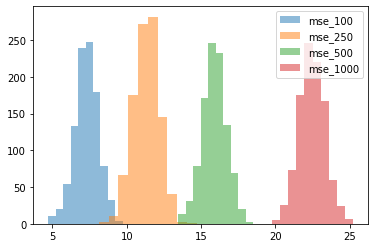

Vary Alpha Levels
Mean: 22.45823442015388 Median: 22.49896401025181 Mode: [[19.83162937]] Variance: 0.7133757773064737
Mean: 22.424909007753524 Median: 22.466256533177006 Mode: [[19.90813117]] Variance: 0.7022270198876285
Mean: 22.410520086681178 Median: 22.410609277732114 Mode: [[19.44805103]] Variance: 0.7209811091599906
Mean: 22.440567616403026 Median: 22.43405620974822 Mode: [[19.66951205]] Variance: 0.787247728783087


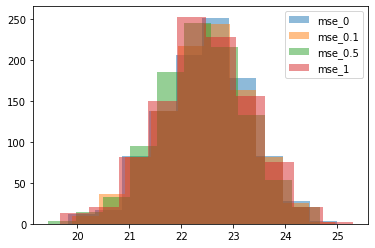

Vary Multiplicative Factors
Mean: 22.401960166521228 Median: 22.37111692680661 Mode: [[19.35235678]] Variance: 0.7507351539024433
Mean: 22.462379731034716 Median: 22.45836055850073 Mode: [[19.68792662]] Variance: 0.6924726896883935
Mean: 22.447680987318627 Median: 22.48087383197798 Mode: [[19.48187015]] Variance: 0.6928622159014207
Mean: 22.45724697111464 Median: 22.4947198559381 Mode: [[19.57192212]] Variance: 0.7611993534326789


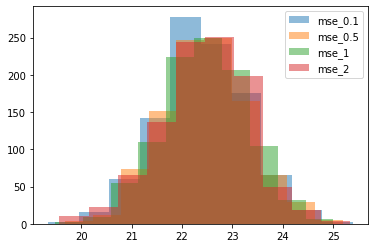

Vary X Variables
Mean: 22.454900989911682 Median: 22.455565792397355 Mode: [[19.71056871]] Variance: 0.6565847258581068
Mean: 22.469559739641902 Median: 22.474252165350066 Mode: [[19.22186755]] Variance: 0.745175410500199
Mean: 22.406622648093727 Median: 22.441600089575076 Mode: [[19.92890609]] Variance: 0.6797486518821937
Mean: 22.448717989266143 Median: 22.468382973411 Mode: [[18.98579794]] Variance: 0.7174597814806829


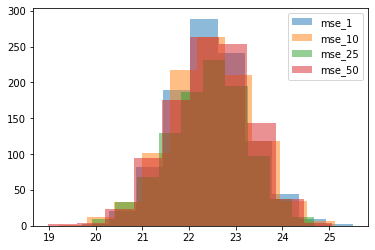

Plot Coefficients


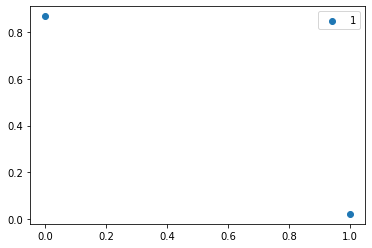

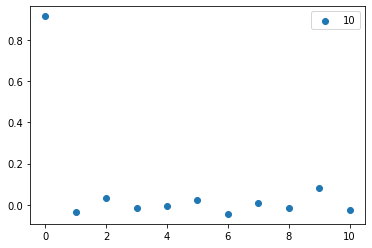

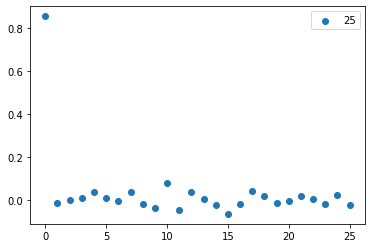

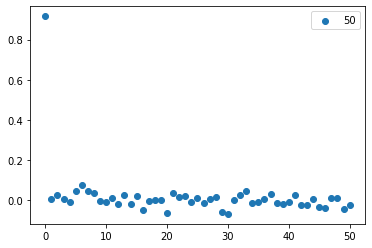

In [5]:
# Model = 3 is Ridge
print('Vary Observations')
vary_obs(3)
print('Vary Alpha Levels')
vary_alpha(3)
print('Vary Multiplicative Factors')
vary_multiply(3)
print('Vary X Variables')
vary_xvars(3)   
print('Plot Coefficients')
params_scatter(3)

Vary Observations
Mean: -1.3517230362185173 Median: -1.3435509476877237 Mode: [[-2.69200591]] Variance: 0.04981146672193958
Mean: -1.6441180013025694 Median: -1.6301859833235668 Mode: [[-2.53426404]] Variance: 0.06162189533282205
Mean: -1.9089626593865114 Median: -1.904187723503954 Mode: [[-2.88060881]] Variance: 0.06873224561723347
Mean: -2.2298349743296995 Median: -2.2098082130146084 Mode: [[-3.12640604]] Variance: 0.06509265201986515


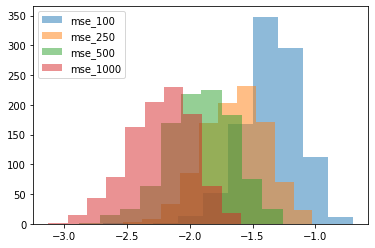

Vary Alpha Levels
Mean: 0.00014291981633067103 Median: 4.205808169862054e-05 Mode: [[-0.0481791]] Variance: 4.333048629960456e-05
Mean: -2.220592636409835 Median: -2.2008075486092316 Mode: [[-3.229442]] Variance: 0.06628760481177505
Mean: -7.6640148268512 Median: -7.646724281583012 Mode: [[-9.10109785]] Variance: 0.10727367483875416
Mean: -13.06477780986914 Median: -13.05824474469518 Mode: [[-14.83470971]] Variance: 0.2743589106334542


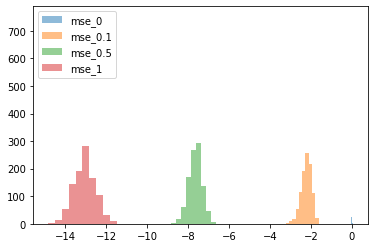

Vary Multiplicative Factors
Mean: -2.0990598011178783 Median: -2.1099604250622264 Mode: [[-3.19739125]] Variance: 0.09748873739209467
Mean: -2.249503258768502 Median: -2.228330288531764 Mode: [[-3.35690597]] Variance: 0.06826835389907354
Mean: -2.227740862783803 Median: -2.205977592414686 Mode: [[-3.31608517]] Variance: 0.06394692654577602
Mean: -2.2275706885358795 Median: -2.2065619071910367 Mode: [[-3.37173559]] Variance: 0.06373597272727557


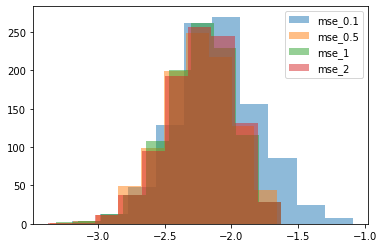

Vary X Variables
Mean: -1.6602342753646944 Median: -1.6398977610136654 Mode: [[-2.29637964]] Variance: 0.013585624093188567
Mean: -2.2280177209270704 Median: -2.2096571002932532 Mode: [[-3.1280426]] Variance: 0.061973082838298825
Mean: -2.9800111768890436 Median: -2.9664145552607515 Mode: [[-4.05980598]] Variance: 0.09642974230548385
Mean: -3.9069821863220673 Median: -3.890600520446422 Mode: [[-5.13248178]] Variance: 0.12539182049952255


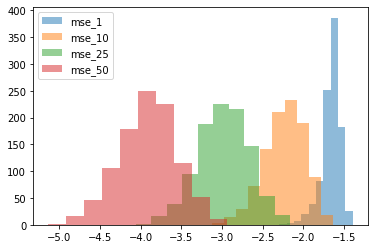

In [6]:
# Model = 4 is OlS - Lasso
print('Vary Observations')
vary_obs(4)
print('Vary Alpha Levels')
vary_alpha(4)
print('Vary Multiplicative Factors')
vary_multiply(4)
print('Vary X Variables')
vary_xvars(4)

Vary Observations
Mean: -0.544183144723238 Median: -0.5354712737307452 Mode: [[-0.95602688]] Variance: 0.009689841017988766
Mean: -0.7689153970346376 Median: -0.7672812003131324 Mode: [[-1.03578335]] Variance: 0.006269070976861501
Mean: -1.0478166103190591 Median: -1.0485746938881615 Mode: [[-1.32818596]] Variance: 0.006177330104978048
Mean: -1.4614055055785977 Median: -1.4603180252595496 Mode: [[-1.81442691]] Variance: 0.006350403599950121


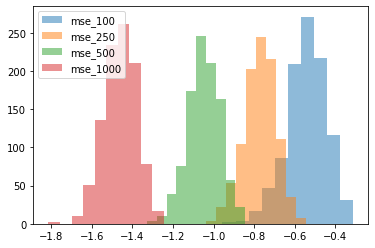

Vary Alpha Levels
Mean: 0.00603288356874067 Median: 0.01253841873396192 Mode: [[-0.82111379]] Variance: 0.05330709589177159
Mean: -12.204571989475323 Median: -12.216259452214786 Mode: [[-13.66970915]] Variance: 0.24637475145085233
Mean: -20.66035843344637 Median: -20.712224380392943 Mode: [[-22.73384853]] Variance: 0.6171834238508234
Mean: -21.64694542985277 Median: -21.683397528045184 Mode: [[-24.12497846]] Variance: 0.644618841508035


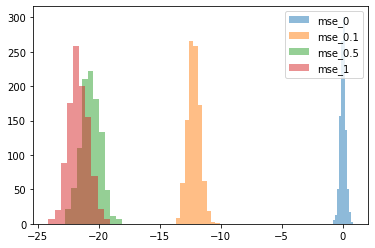

Vary Multiplicative Factors
Mean: -0.20879753202690024 Median: -0.20792871831818738 Mode: [[-0.35444149]] Variance: 0.0015227169032057345
Mean: -0.7426274834142936 Median: -0.74212129843961 Mode: [[-0.92757953]] Variance: 0.003034675589583878
Mean: -1.4567273394324667 Median: -1.4566857772906374 Mode: [[-1.70033548]] Variance: 0.0062521463175912294
Mean: -2.886935513007109 Median: -2.8808997948553245 Mode: [[-3.61510547]] Variance: 0.017768881897309168


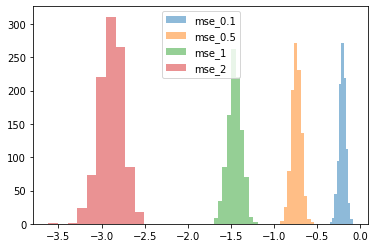

Vary X Variables
Mean: -1.441755757080845 Median: -1.4403214106053994 Mode: [[-1.7049276]] Variance: 0.005776207189262598
Mean: -1.4607426552503022 Median: -1.4580522409386392 Mode: [[-1.74978178]] Variance: 0.006277449665929908
Mean: -1.492862809170665 Median: -1.4899262047790853 Mode: [[-1.77189044]] Variance: 0.006645049073472396
Mean: -1.5466978631693777 Median: -1.545573483633277 Mode: [[-1.89366085]] Variance: 0.007029112573968264


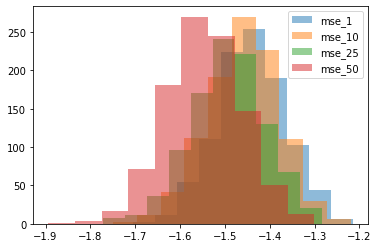

In [7]:
# Model = 5 is OlS - Ridge
print('Vary Observations')
vary_obs(5)
print('Vary Alpha Levels')
vary_alpha(5)
print('Vary Multiplicative Factors')
vary_multiply(5)
print('Vary X Variables')
vary_xvars(5)   

Vary Observations
Mean: 1.4096051069777373 Median: 1.397291789237861 Mode: [[0.62725126]] Variance: 0.07504583354857561
Mean: 1.6398813426680858 Median: 1.6273346246650908 Mode: [[0.67171562]] Variance: 0.09790023025348941
Mean: 1.815365975710152 Median: 1.8095187304281573 Mode: [[0.70630179]] Variance: 0.11870986477751802
Mean: 1.9862088645964597 Median: 1.967650699993806 Mode: [[1.13793644]] Variance: 0.11147457320431897


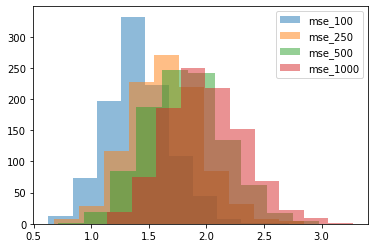

Vary Alpha Levels
Mean: -8.204194420820978e-05 Median: 3.327481017823301e-05 Mode: [[-0.06928273]] Variance: 5.612694872179494e-05
Mean: -12.901341580172463 Median: -12.878432042550678 Mode: [[-14.70874106]] Variance: 0.2781560034111042
Mean: -21.01895777258095 Median: -21.033611400590154 Mode: [[-23.29422433]] Variance: 0.6300631495965454
Mean: -21.825893989269655 Median: -21.85478255904713 Mode: [[-25.58782488]] Variance: 0.7358704632377451


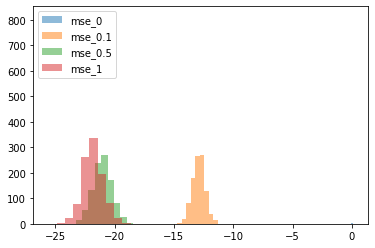

Vary Multiplicative Factors
Mean: 2.2942436178207983 Median: 2.3049283212164626 Mode: [[1.03948632]] Variance: 0.12027259522417424
Mean: 2.646442428052858 Median: 2.6187140801018773 Mode: [[2.1228492]] Variance: 0.0570304787308259
Mean: 1.9757424985652186 Median: 1.9637849900855056 Mode: [[1.03685264]] Variance: 0.10952569756752431
Mean: -1.803342087078806 Median: -1.8348769135045786 Mode: [[-4.00291814]] Variance: 0.6264062927944821


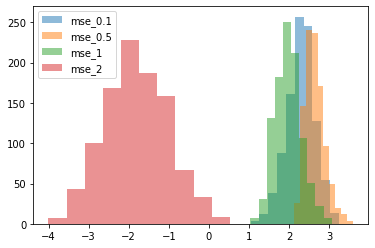

Vary X Variables
Mean: 1.8179470144182528 Median: 1.6653832897949412 Mode: [[-0.11457727]] Variance: 0.3475265184844793
Mean: 1.9908669764189313 Median: 1.9688554877744386 Mode: [[0.9923635]] Variance: 0.11128256403921973
Mean: 2.852913383085869 Median: 2.8518972352142176 Mode: [[1.83218768]] Variance: 0.1398332703262783
Mean: 3.969301224024438 Median: 3.9466859928584763 Mode: [[2.85300311]] Variance: 0.14643505840505627


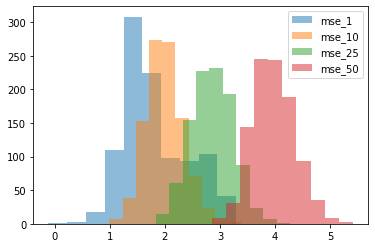

In [8]:
# Model = 6 is Lasso - Ridge
print('Vary Observations')
vary_obs(6)
print('Vary Alpha Levels')
vary_alpha(6)
print('Vary Multiplicative Factors')
vary_multiply(6)
print('Vary X Variables')
vary_xvars(6) 